In [109]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import math
# from util import findCentroid, rotateImage, halveTheRegionHorizontally, computeAsymmetry

import numpy as np
from PIL import Image
from skimage.measure import find_contours, label
from skimage.morphology import binary_closing
import random
from noise import pnoise2
from PIL import ImageOps

# ENV
import os

# ISIC API
import requests
import glob

# Main data structure(s)
import pandas as pd
import numpy as np

# For pi value
import math

# For API calls
import time
import json

# Building a data set
import shutil
import zipfile
from io import BytesIO

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Data normalization
from sklearn import preprocessing

# Feature extraction
from skimage import morphology
from skimage.transform import rotate
from scipy.spatial.distance import cdist
from scipy.stats.stats import mode

# Color 'brightness' (value) spread
from skimage.segmentation import slic # Segments image using k-means clustering in Color-(x,y,z) space
from skimage.measure import regionprops
from skimage.color import rgb2hsv # Converts RGB color to HSV (Hue, Saturation, Value)

# Proper split of training and test data
from sklearn.model_selection import train_test_split

# Feature selection
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest

# Model building
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For model evaluation
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

C:\Users\jackh\AppData\Local\Temp\ipykernel_13100\1187485378.py:52: DeprecationWarning: Please use `mode` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import mode


In [78]:
import csv

filename = '../data/metadata.csv'
label_counts = {'MEL': 0, 'SEK': 0}

with open(filename, 'r') as csvfile:
    csvreader = csv.reader(csvfile)

    # Skip the header row
    next(csvreader)

    # Loop over each row in the CSV file
    for row in csvreader:
        # Get the label in column 18
        label = row[17]

        # If the label is 'MEL' or 'SEK', increment the corresponding count
        if label in label_counts:
            label_counts[label] += 1

print('Number of MEL labels:', label_counts['MEL'])
print('Number of SEK labels:', label_counts['SEK'])

Number of MEL labels: 52
Number of SEK labels: 235


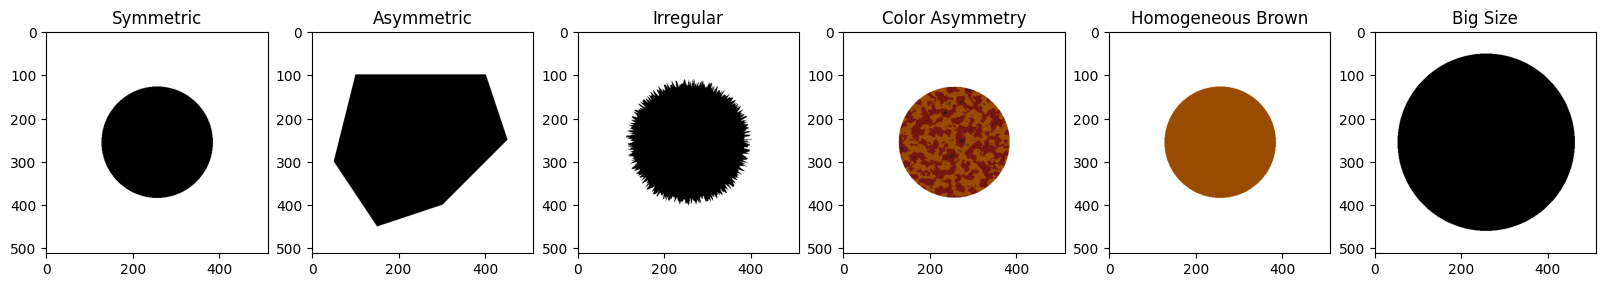

In [100]:
# Create a blank 512x512 image with a white background
width, height = 512, 512
symmetric_img = Image.new('1', (width, height), 'white')

# Draw a circle in the center of the image
draw = ImageDraw.Draw(symmetric_img)
circle_radius = min(width, height) // 4
circle_center = (width // 2, height // 2)
draw.ellipse((circle_center[0] - circle_radius, circle_center[1] - circle_radius,
              circle_center[0] + circle_radius, circle_center[1] + circle_radius),
             fill='black')


# Create a blank 512x512 image with a white background
width, height = 512, 512
asymmetric_img = Image.new('1', (width, height), 'white')

# Draw an asymmetric polygon on the image
draw = ImageDraw.Draw(asymmetric_img)
polygon_points = [
    (100, 100),
    (400, 100),
    (450, 250),
    (300, 400),
    (150, 450),
    (50, 300)
]
draw.polygon(polygon_points, fill='black')

# Create a blank 512x512 image with a white background
width, height = 512, 512
irregular_img = Image.new('1', (width, height), 'white')

# Draw an irregular circular border on the image
draw = ImageDraw.Draw(irregular_img)
circle_center = (width // 2, height // 2)
radius = min(width, height) // 2 - 120
num_segments = 500
angle_step = 2 * math.pi / num_segments

# Generate points for the irregular border
points = []
for i in range(num_segments):
    angle = i * angle_step
    random_radius_offset = random.uniform(-10, 10)
    x = circle_center[0] + (radius + random_radius_offset) * math.cos(angle)
    y = circle_center[1] + (radius + random_radius_offset) * math.sin(angle)
    points.append((x, y))

# Draw the irregular border figure
draw.polygon(points, fill='black')




# Create a blank 512x512 image with a white background
width, height = 512, 512
colorasymmetry_img = Image.new('RGB', (width, height), 'white')
draw = ImageDraw.Draw(colorasymmetry_img)

# Define colors
colors = [
    (197, 188, 217),  # white
    (41, 31, 30),     # black
    (118, 21, 17),    # red
    (153, 76, 0),     # light brown
    (102, 51, 0),     # dark brown
    (70, 130, 180)    # blue-gray
]

circle_radius = min(width, height) // 4
circle_center = (width // 2, height // 2)

# Parameters for the Perlin noise function
scale = 0.05
octaves = 4
persistence = 0.5
lacunarity = 2.0

for y in range(height):
    for x in range(width):
        # Calculate the distance from the center of the image
        dx = x - circle_center[0]
        dy = y - circle_center[1]
        distance = np.sqrt(dx * dx + dy * dy)

        if distance <= circle_radius:
            # Generate Perlin noise value
            noise_val = pnoise2(x * scale, y * scale, octaves, persistence, lacunarity)

            # Map noise value to a color index
            color_idx = int(((noise_val + 1) / 2) * len(colors)) % len(colors)

            # Set the pixel color
            draw.point((x, y), fill=colors[color_idx])



# Create a blank 512x512 image with a white background
width, height = 512, 512
homogeneous_brown_img = Image.new('RGB', (width, height), 'white')

# Draw a circle in the center of the image with a homogenous brown color
draw = ImageDraw.Draw(homogeneous_brown_img)
circle_radius = min(width, height) // 4
circle_center = (width // 2, height // 2)
brown_color = (153, 76, 0)  # Brown color

draw.pieslice((circle_center[0] - circle_radius, circle_center[1] - circle_radius,
               circle_center[0] + circle_radius, circle_center[1] + circle_radius),
              start=0, end=360, fill=brown_color)



# Create a blank 512x512 image with a white background
width, height = 512, 512
big_img = Image.new('1', (width, height), 'white')

# Draw a circle in the center of the image
draw = ImageDraw.Draw(big_img)
circle_radius = min(width, height) // 2.5
circle_center = (width // 2, height // 2)
draw.ellipse((circle_center[0] - circle_radius, circle_center[1] - circle_radius,
              circle_center[0] + circle_radius, circle_center[1] + circle_radius),
             fill='black')


# display all images side by side as Matplotlib figure with title for each image
fig, ax = plt.subplots(1, 6, figsize=(20, 20))
ax[0].imshow(symmetric_img, cmap='gray')
ax[0].set_title('Symmetric')
ax[1].imshow(asymmetric_img, cmap='gray')
ax[1].set_title('Asymmetric')
ax[2].imshow(irregular_img, cmap='gray')
ax[2].set_title('Irregular')
ax[3].imshow(colorasymmetry_img)
ax[3].set_title('Color Asymmetry')
ax[4].imshow(homogeneous_brown_img)
ax[4].set_title('Homogeneous Brown')
ax[5].imshow(big_img, cmap='gray')
ax[5].set_title('Big Size')
plt.show()

Asymmetry score:

In [45]:
def asymmetry_score(image_path):
    # if image_path is of type Image, then continue, else open the image
    if isinstance(image_path, Image.Image):
        image = image_path.convert('1')
    else:
        image = Image.open(image_path).convert('1')
    
    width, height = image.size

    # Calculate areas for each half along both axes
    area_top, area_bottom, area_left, area_right = 0, 0, 0, 0
    for y in range(height):
        for x in range(width):
            pixel_value = image.getpixel((x, y))
            if pixel_value == 0:  # Black pixel
                if y < height // 2:
                    area_top += 1
                else:
                    area_bottom += 1

                if x < width // 2:
                    area_left += 1
                else:
                    area_right += 1

    # Calculate the asymmetry scores for both axes
    vertical_asymmetry = abs(area_top - area_bottom) / (area_top + area_bottom)
    horizontal_asymmetry = abs(area_left - area_right) / (area_left + area_right)

    # Calculate the average asymmetry score
    average_asymmetry = (vertical_asymmetry + horizontal_asymmetry) / 2
    return average_asymmetry

# mask_path = 'your_mask_image_path.png'
print("Asymmetry score for Symmetric Image:", asymmetry_score(symmetric_img))
print("Asymmetry score for Asymmetric Image:", asymmetry_score(asymmetric_img))

Asymmetry score for Symmetric Image: 0.004955936517731453
Asymmetry score for Asymmetric Image: 0.09888327467903978


Irregular border measurement:

In [48]:
import numpy as np
from PIL import Image
from skimage.measure import find_contours, label
from skimage.morphology import binary_closing

def border_irregularity_score(image_path):
    # Load the image and convert to a binary numpy array
    # if image_path is of type Image, then continue, else open the image
    if isinstance(image_path, Image.Image):
        image = image_path.convert('1')
    else:
        image = Image.open(image_path).convert('1')

    mask = np.array(image)

    # Close small gaps in the mask to get a better contour
    mask_closed = binary_closing(mask)

    # Find contours and take the longest one as the border
    contours = find_contours(mask_closed, 0.5)
    border = max(contours, key=len)

    # Calculate the perimeter of the border
    perimeter = 0
    for i in range(len(border) - 1):
        perimeter += np.linalg.norm(border[i + 1] - border[i])

    # Calculate the area of the mask
    area = np.sum(mask)

    # Calculate the border irregularity score (perimeter-to-area ratio)
    irregularity_score = perimeter / area
    return irregularity_score

print("Border irregularity score / Smooth:", border_irregularity_score(symmetric_img))
print("Border irregularity score / Irregular:", border_irregularity_score(irregular_img))

Border irregularity score / Smooth: 0.0040472901122593306
Border irregularity score / Irregular: 0.01044896544168871


Load masked image

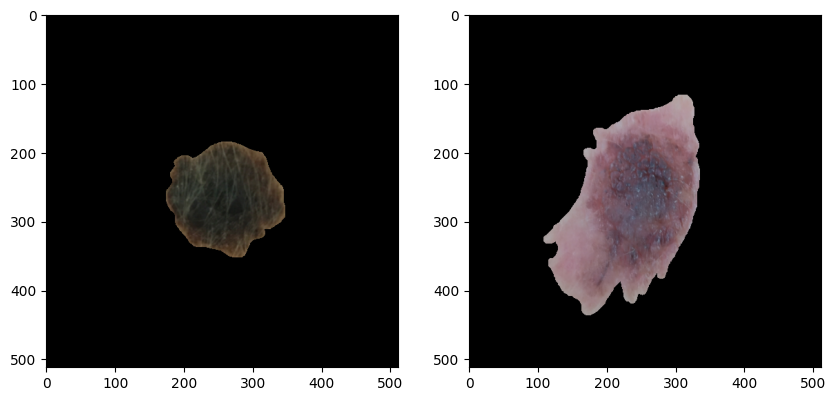

In [69]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

def load_masked_image(image_path, mask_path):
    # read image in BGR
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    # convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    masked_image = cv2.bitwise_and(image, image, mask=mask) # apply mask to image
    return masked_image

image_path = '..\\data\\shanon_training\\PAT_710_1330_243.PNG'
mask_path = '..\\data\\shanon_masks_groundtruth\\PAT_710_1330_243.PNG'
masked_image = load_masked_image(image_path, mask_path)

image_path1 = '..\\data\\shanon_training\\PAT_975_1834_152.PNG'
mask_path1 = '..\\data\\shanon_masks_groundtruth\\PAT_975_1834_152.PNG'
masked_image1 = load_masked_image(image_path1, mask_path1)

# display
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(masked_image)
plt.subplot(1, 2, 2)
plt.imshow(masked_image1)
plt.show()

The image is subdivided into blocks of 3 × 3 pixels. We select only those who have at least 75% of their area inside the lesion. The colour average of each selected block is computed. 
The image with more variance among the blocks has higher score. Make a score from 0 to 6

In [79]:
import numpy as np
from skimage.color import rgb2lab

def color_symmetry(image):
    # Convert image to LAB color space
    lab_image = rgb2lab(image)

    # Get image dimensions
    height, width, _ = image.shape

    # Divide image into 3x3 blocks
    block_size = 3
    num_blocks_x = width // block_size
    num_blocks_y = height // block_size

    # Initialize list to store color averages
    color_avgs = []

    # Loop through each block
    for i in range(num_blocks_x):
        for j in range(num_blocks_y):
            # Get the block from the image
            block = lab_image[j*block_size:(j+1)*block_size, i*block_size:(i+1)*block_size, :]

            # Check if block is at least 75% inside lesion
            if np.sum(block[:, :, 0] < 90) >= (0.75 * block_size**2):
                # Compute color average for the block
                color_avg = np.mean(block, axis=(0, 1))
                color_avgs.append(color_avg)

    # Compute variance of color averages
    variances = np.var(color_avgs, axis=0)
    variance_score = np.mean(variances)
    
    # Clip variance score between 0 and 100
    variance_score = np.clip(variance_score, 0, 100)

    # Map the score to a scale from 0 to 6
    score = round(6 * variance_score / 100)

    return score

In [80]:
# Convert images to numpy arrays
homogeneous_brown_arr = np.array(homogeneous_brown_img)
colorasymmetry_arr = np.array(colorasymmetry_img)

# Call the color_symmetry function with the numpy arrays
print('Symmetric image:', color_symmetry(homogeneous_brown_arr))
print('Asymmetric image:', color_symmetry(colorasymmetry_arr))

Symmetric image: 0
Asymmetric image: 4


Now, to skin lesion images

In [81]:
masked_image_arr = np.array(masked_image)
masked_image1_arr = np.array(masked_image1)

print('Symmetric image:', color_symmetry(masked_image_arr))
print('Asymmetric image:', color_symmetry(masked_image1_arr))

Symmetric image: 1
Asymmetric image: 6


Size measurement

In [112]:
from PIL import Image

def mask_size(image):
    # Convert to black and white
    bw_image = image.convert('1')

    # Invert the image so that black pixels are white and vice versa
    inv_image = ImageOps.invert(bw_image)

    # Get the size of the inverted image
    width, height = inv_image.size

    # Initialize a variable to store the number of black pixels
    num_black_pixels = 0

    # Loop through each pixel in the inverted image
    for y in range(height):
        for x in range(width):
            # Get the pixel value (0 for black, 255 for white)
            pixel = inv_image.getpixel((x, y))

            # If the pixel is black, increment the count
            if pixel == 0:
                num_black_pixels += 1

    # Return the total number of black pixels
    return num_black_pixels

In [113]:
small = mask_size(symmetric_img)
large = mask_size(big_img)
print('Area of small image:', small)
print('Area of large image:', large)

Area of small image: 210287
Area of large image: 130847
